# Probability distribution for Air quality

## **Introduction**


In this project, we are working in the analytics team for the United States Environmental Protection Agency (EPA). The data includes information about more than 200 sites, identified by state, county, city, and local site names. One of the main goals is to determine which regions need support to make air quality improvements. Given that carbon monoxide is a major air pollutant, we will investigate data from the Air Quality Index (AQI) with respect to carbon monoxide.

In [1]:
# Import relevant libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [2]:
# Load data into a DataFrame and save in a variable.
data= pd.read_csv(r'C:\Users\user\Desktop\Course 4\modified_c4_epa_air_quality.csv')

## Data Exploration

In [3]:
data.head(5)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294


In [15]:
data.shape

(260, 8)

Now, we want to find out whether `aqi_log` fits a specific type of probability distribution. Create a histogram to visualize the distribution of `aqi_log`. Then, based on its shape, visually determine if it resembles a particular distribution.

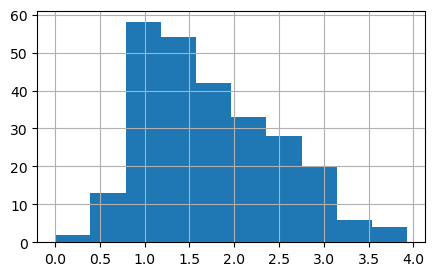

In [24]:
plt.figure(figsize=(5,3))
data['aqi_log'].hist();

### Quick Insight
  There is a slight right skew, but it still appears to be a bell shape. This shape suggests that the distribution of this data should be approximately normal.

## Statistical tests

 The empirical rule states that, for every normal distribution: 
- 68% of the data fall within 1 standard deviation of the mean
- 95% of the data fall within 2 standard deviations of the mean
- 99.7% of the data fall within 3 standard deviations of the mean



First, define two variables to store the mean and standard deviation, respectively, for `aqi_log`. Creating these variables will help you easily access these measures as you continue with the calculations involved in applying the empirical rule. 

In [26]:
# Calculate mean of aqi_log
mean_aqi_log= data['aqi_log'].mean()

#Print the mean
print(mean_aqi_log)

1.7669210929985577


In [27]:
#Calculate Std of aqi_log
std_aqi_log= data['aqi_log'].std()

#Print the std
print(std_aqi_log)

0.7147155520223721


Now, check the first part of the empirical rule: whether 68% of the `aqi_log` data falls within 1 standard deviation of the mean.

In [29]:
# Define variable for lower limit, 1 standard deviation below the mean.
lower_limit= mean_aqi_log - 1*std_aqi_log

# Define variable for upper limit, 1 standard deviation above the mean.
upper_limit= mean_aqi_log + 1*std_aqi_log

#Print the result
print(lower_limit, upper_limit)

1.0522055409761855 2.48163664502093


In [31]:
# Display the actual percentage of data that falls within 1 standard deviation of the mean.
((data['aqi_log']>= lower_limit) & (data['aqi_log'] <= upper_limit)).mean()*100

76.15384615384615

Now, consider the second part of the empirical rule: whether 95% of the `aqi_log` data falls within 2 standard deviations of the mean.


In [33]:
# Define variable for lower limit, 2 standard deviation below the mean.
lower_limit= mean_aqi_log - 2*std_aqi_log

# Define variable for upper limit, 2 standard deviation above the mean.
upper_limit= mean_aqi_log + 2*std_aqi_log

#Print the result
print(lower_limit, upper_limit)

0.33748998895381344 3.1963521970433018


In [34]:
# Display the actual percentage of data that falls within 1 standard deviation of the mean.
((data['aqi_log']>= lower_limit) & (data['aqi_log'] <= upper_limit)).mean()*100

95.76923076923077

Now, consider the third part of the empirical rule:whether 99.7% of the `aqi_log` data falls within 3 standard deviations of the mean.

In [35]:
# Define variable for lower limit, 3 standard deviations below the mean.
lower_limit = mean_aqi_log - 3 * std_aqi_log


# Define variable for upper limit, 3 standard deviations above the mean.
upper_limit = mean_aqi_log + 3 * std_aqi_log


# Display lower_limit, upper_limit.
print(lower_limit, upper_limit)

-0.3772255630685586 3.911067749065674


In [36]:
# Display the actual percentage of data that falls within 3 standard deviations of the mean.
((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

99.61538461538461

##  Results and evaluation

- About 76.15% of the data falls within 1 standard deviation of the mean.
- About 95.77% of the data falls within 2 standard deviation of the mean.
- About 99.62% of the data falls within 3 standard deviations of the mean.

The 95.77% is very close to 95%, and the 99.62% is very close to 99.7%. The 76.15% is not as close to 68%, but relatively close. Overall, from applying the empirical rule, the data appears to be not exactly normal, but could be considered approximately normal. 

## 
### Since z-score indicates the relative position of values (for instance, z-score measures how many standard deviations below or above the mean a data point is), it can be used to detect outliers.

#### Z-score could be used to identify values that lie more than 3 standard deviations below or above the mean. These values may be considered outliers. It is an alternative way to using Box plot.

In [39]:
#Compute the z-score for every `aqi_log` value. Then, add a column named `z_score` in the data to store those results. 
data['z_score']= stats.zscore(data['aqi_log'])

data.head(5)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.438109
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034820
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.936873
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.533584
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.533584


In [49]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean
data[(data["z_score"] > 3) | (data["z_score"] < -3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.034886


## Quick Insight
The `aqi_log` for West Phoenix is slightly above 3 standard deviations of the mean. This means that the air quality at that site is worse than the rest of the sites represented in the data.

## 

Detecting outliers is important because they can reveal two important things, depending on the context: First, they can identify measurements that were taken incorrectly. Second, they can highlight parts of the data that can be focused on to make improvements. 

For example, if the `aqi_log` for West Phoenix is considered an outlier, then that site can be studied further to determine what practices or changes might improve the air quality.

# Considerations

### My summary to Stakeholders
- The distribution of the `aqi_log` data is approximately normal.

- Using statistical methods, it was determined that the site at West Phoenix has worse air quality than the other sites. 
